In [1]:
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("formated_data_1111.csv")
data.head()

,intern_num,max_sal,min_sal,city,month_num,day,2000,500-2000,50-500,<50,...,专员,产品,销售,开发,工程师,助理,运营,GDP(billion),GDP per capita,Population(thousand)
0,176,150,100,北京,3,3,1,0,0,0,...,0,0,0,0,0,0,0,3500.0,162518.5736,21536.0
1,390,150,120,北京,3,5,1,0,0,0,...,0,0,0,0,0,0,0,3500.0,162518.5736,21536.0
2,44,300,150,北京,5,4,1,0,0,0,...,0,0,0,1,1,0,0,3500.0,162518.5736,21536.0
3,486,200,150,北京,4,5,1,0,0,0,...,0,0,0,0,0,1,0,3500.0,162518.5736,21536.0
4,390,150,100,北京,3,5,1,0,0,0,...,0,0,0,0,0,0,1,3500.0,162518.5736,21536.0


In [3]:
# Min_Max scaler for GDP
data['GDP'] = (data['GDP per capita'] - 
               data['GDP per capita'].min())/(data['GDP per capita'].max() - data['GDP per capita'].min())

In [4]:
data['GDP']

0       0.703405
1       0.703405
2       0.703405
3       0.703405
4       0.703405
          ...   
4945    0.744754
4946    0.744754
4947    0.744754
4948    0.744754
4949    0.744754
Name: GDP, Length: 4950, dtype: float64

In [5]:
#删除最高工资是0的行

data = data.drop(data[data['max_sal'] < 1].index)

In [6]:
#选用来train的feature

data_1 = data[['intern_num','max_sal','min_sal','GDP per capita','GDP','month_num','day','2000','500-2000','50-500','<50','互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']]
# data_1['scale'] = data_1['2000']*5000 + data_1['500-2000']*1250 + data_1['50-500']*275 + data_1['<50']*25 
data_1

,intern_num,max_sal,min_sal,GDP per capita,GDP,month_num,day,2000,500-2000,50-500,...,互联网,教育,房产,广告,金融,企业服务,快消,电子,医疗,汽车
0,176,150,100,162518.5736,0.703405,3,3,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,390,150,120,162518.5736,0.703405,3,5,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,44,300,150,162518.5736,0.703405,5,4,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,486,200,150,162518.5736,0.703405,4,5,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,390,150,100,162518.5736,0.703405,3,5,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,73,180,120,169782.5765,0.744754,6,5,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4946,96,200,100,169782.5765,0.744754,3,5,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4947,96,180,100,169782.5765,0.744754,3,5,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4948,96,180,100,169782.5765,0.744754,3,5,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
# data_1.sort_values(by = 'max_sal')

In [8]:
#确定 X和 y

X = data_1[['intern_num','GDP per capita','month_num','day','2000','500-2000','50-500','<50','互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']]
# X = data_1[['intern_num','GDP per capita','month_num','day','scale','互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']]
y = data_1['max_sal']

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

In [11]:
model  = LinearRegression()
# model.fit(X_train, y_train)
# y_predicted = model.predict(X_train)

In [12]:
train_mse = []
test_mse = []

In [13]:
# degree 2
poly = PolynomialFeatures(degree = 2)
poly.fit(X_train)

# apply the tranformer to our X matrix
X_with_2nd_degree = poly.transform(X_train)
model.fit(X_with_2nd_degree, y_train)
y_predicted = model.predict(X_with_2nd_degree)

MSE_poly = mean_squared_error(y_train, y_predicted)
print(MSE_poly)

#test set
X_test_2nd = poly.transform(X_test)
y_test_predicted = model.predict(X_test_2nd)
MSE_poly_test = mean_squared_error(y_test, y_test_predicted)
print(MSE_poly_test)

train_mse.append(MSE_poly)
test_mse.append(MSE_poly_test)

6229.478378897559
7681.648506163187


In [18]:
# 放在一起(degree从1到4)
from sklearn.metrics import mean_absolute_error

train_mse = []
train_mae = []
test_mse = []
test_mae = []
degree_range = [1,2,3,4,5,6]

model  = LinearRegression()

for degree in degree_range:
    
    poly = PolynomialFeatures(degree = degree)
    poly.fit(X_train)

    # apply the tranformer to our X matrix
    X_with_2nd_degree = poly.transform(X_train)
    model.fit(X_with_2nd_degree, y_train)
    y_predicted = model.predict(X_with_2nd_degree)

    MSE_poly = mean_squared_error(y_train, y_predicted)
    MAE_poly = mean_absolute_error(y_train, y_predicted)
#     print(MSE_poly)

    #test set
    X_test_2nd = poly.transform(X_test)
    y_test_predicted = model.predict(X_test_2nd)
    MSE_poly_test = mean_squared_error(y_test, y_test_predicted)
    MAE_poly_test = mean_absolute_error(y_test, y_test_predicted)
#     print(MSE_poly_test)

    train_mse.append(MSE_poly)
    test_mse.append(MSE_poly_test)
    train_mae.append(MAE_poly)
    test_mae.append(MAE_poly_test)

In [19]:
print(train_mse)
print(test_mse)
print(train_mae)
print(test_mae)

[6864.668338924669, 6229.478378897559, 6667.399367809374, 5956.317267329098, 6073.919823398339, 6014.644723583926]
[7591.976708433853, 7681.648506163187, 9492.214122436208, 7464.05879989564, 7864.695371974533, 7542.947116215983]
[55.853054538380256, 52.998968751960284, 54.37529048756417, 51.720099962619365, 52.44415320660154, 51.38364979724136]
[59.17305785210505, 58.778837427401264, 63.03425174889548, 58.664332878368974, 59.186643201080166, 57.94911978112572]


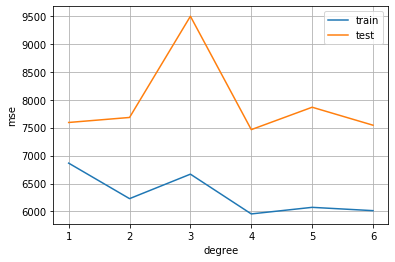

In [20]:
plt.plot(degree_range, train_mse, label="train")
plt.plot(degree_range, test_mse, label="test")
plt.xlabel('degree')
plt.ylabel('mse')
plt.grid()
plt.legend()

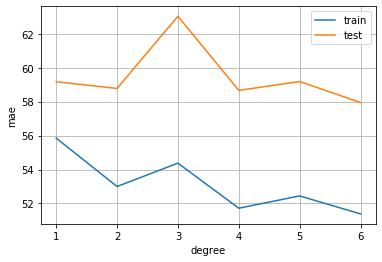

In [21]:
plt.plot(degree_range, train_mae, label="train")
plt.plot(degree_range, test_mae, label="test")
plt.xlabel('degree')
plt.ylabel('mae')
plt.grid()
plt.legend()

In [22]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 放在一起(degree从1到4) For SGD

train_mse = []
train_mae = []
test_mse = []
test_mae = []

degree_range = [1,2,3,4,5,6]

model = SGDRegressor()

for degree in degree_range:
    
    poly = PolynomialFeatures(degree = degree)
    poly.fit(X_train)

    # apply the tranformer to our X matrix
    X_with_2nd_degree = poly.transform(X_train)
    
#     model.fit(X, y)

    model.fit(X_with_2nd_degree, y_train)
    y_predicted = model.predict(X_with_2nd_degree)

    MSE_poly = mean_squared_error(y_train, y_predicted)
    MAE_poly = mean_absolute_error(y_train, y_predicted)
#     print(MSE_poly)

    #test set
    X_test_2nd = poly.transform(X_test)
    y_test_predicted = model.predict(X_test_2nd)
    MSE_poly_test = mean_squared_error(y_test, y_test_predicted)
    MAE_poly_test = mean_absolute_error(y_test, y_test_predicted)
#     print(MSE_poly_test)

    train_mse.append(MSE_poly)
    test_mse.append(MSE_poly_test)
    train_mae.append(MAE_poly)
    test_mae.append(MAE_poly_test)

print(train_mse)
print(test_mse)
print(train_mae)
print(test_mae)

[1.7261964617236673e+37, 1.2985662145181213e+58, 2.473248040268223e+79, 2.4403622036537962e+101, 5.805955422823315e+120, 6.841542157639816e+142]
[1.718659047524123e+37, 1.293665629248924e+58, 2.4686162241087564e+79, 2.4381830645840996e+101, 5.79546209142084e+120, 6.807172949449354e+142]
[4.088392179706656e+18, 1.0846234413040669e+29, 4.527128533003905e+39, 4.247096902572769e+50, 1.9292100714532644e+60, 1.9247279320934577e+71]
[4.0758912273347855e+18, 1.0799937405081262e+29, 4.507708626342894e+39, 4.2313157738190226e+50, 1.9237541087745703e+60, 1.9210577318742522e+71]


36188.20434882477

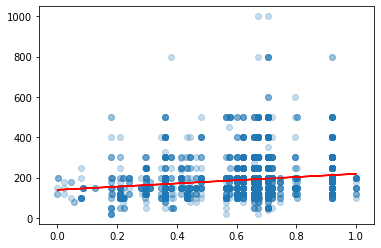

In [206]:
#尝试只看GDP和工资

model  = LinearRegression()
model.fit(np.asarray(data['GDP']).reshape(-1, 1), data_1['max_sal'])
y_predicted = model.predict(np.asarray(data['GDP']).reshape(-1, 1))

# report the results
# print(MSE_lr)
plt.scatter(data['GDP'],data_1['max_sal'], alpha = 0.25)
plt.plot(data['GDP'],y_predicted,color="red");
mse_gdp = mean_squared_error(np.asarray(data['GDP']).reshape(-1, 1), y_predicted)
mse_gdp

3814.654058256047

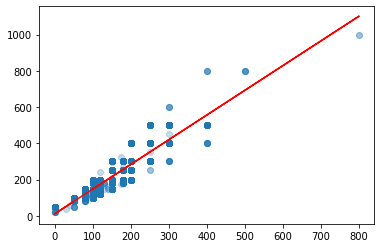

In [207]:
#看min和max之间的关系

model  = LinearRegression()
model.fit(np.asarray(data['min_sal']).reshape(-1, 1), data_1['max_sal'])
y_predicted = model.predict(np.asarray(data['min_sal']).reshape(-1, 1))

plt.scatter(data['min_sal'],data_1['max_sal'], alpha = 0.25)
plt.plot(data['min_sal'],y_predicted,color="red");

mse_sal = mean_squared_error(np.asarray(data['min_sal']).reshape(-1, 1), y_predicted)
mse_sal

In [10]:
data['max_sal'].mean()

190.4727686891696

In [11]:
data['min_sal'].mean()

132.1352246841996

In [22]:
data.groupby(['max_sal','min_sal'])['intern_num'].count().head(40)

max_sal  min_sal
20       0            7
40       30           1
50       0           29
         1            2
         50           5
60       40           1
80       50          17
         80           7
100      50         111
         80         114
         90           1
         99           1
         100         69
101      100          1
110      100          1
112      100          1
120      80         158
         90           3
         100        281
         110          1
         120         66
121      120          3
130      120          1
140      120          1
147      80           1
150      80          80
         100        864
         120        473
         130          1
         140          2
         150        119
151      150          1
160      100          1
         110          1
         120          1
         140          1
170      130          1
176      175          1
180      100         66
         120        186
Name: intern_num, dtype

In [ ]:
['<120','120-149','150-179','180-239','>=240']
data['sal_label'] = 

In [17]:
data.groupby('min_sal')['max_sal'].count()

min_sal
0        36
1         2
30        1
40        1
50      133
80      360
90        4
99        1
100    1548
110       2
120     863
130       6
140       3
150    1056
175       2
180     169
200     387
250     115
300     103
400      30
500       5
800       2
Name: max_sal, dtype: int64